In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# importing the library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer


In [11]:
# reading the dataset
data = pd.read_csv('/content/spam.csv', encoding='latin-1')

In [12]:
# first 5 examples of the data set
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [13]:
# Checking for null values in the dataset
data.isnull().any()

v1            False
v2            False
Unnamed: 2     True
Unnamed: 3     True
Unnamed: 4     True
dtype: bool

In [14]:
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [15]:
# renaming columns v1 as class and v2 as text
data = data.rename(columns={'v1': 'class', 'v2': 'text'})

In [16]:
data.shape

(5572, 2)

In [17]:
data.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
print (data['class'].value_counts()['spam']/float(len(data))*100)

13.406317300789663


Text(0, 0.5, 'Frequency')

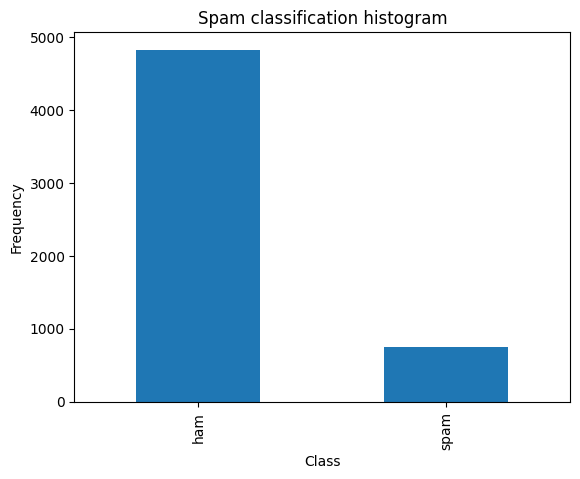

In [19]:
count_classes = pd.value_counts(data['class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Spam classification histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [20]:
# convert classes to 1 if Spam and 0 if not
data['class'] = np.where(data['class']=='spam',1,0)
X = data['text']
y = data['class']

In [21]:
from sklearn.model_selection import train_test_split
# splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
X_train.shape

(3900,)

**Data Exploration**

In order to find which are the most commonly used words for spam and regular messages and  plot their wordcloud representations.

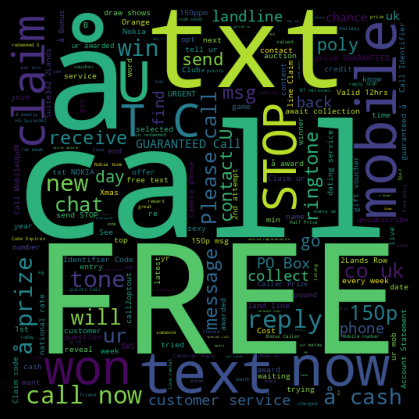

In [23]:
from wordcloud import WordCloud
# visualizing the spam words using wordcloud
spam_words = ''.join(list(data[data['class']==1]['text']))
spam_word_cloud = WordCloud(width=512, height=512).generate(spam_words)
plt.figure(figsize=(4,4), facecolor='k')
plt.imshow(spam_word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Now, lets look at the wordcloud representation of ham messages

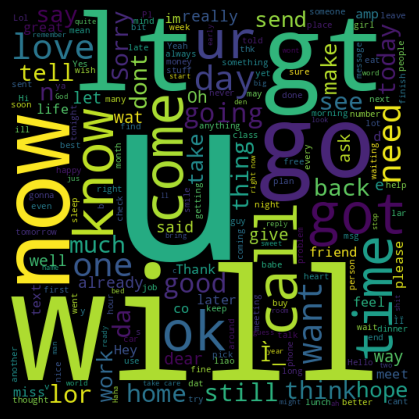

In [24]:
not_spam_words = ''.join(list(data[data['class']==0]['text']))
not_spam_word_cloud = WordCloud(width=512, height=512).generate(not_spam_words)
plt.figure(figsize=(4,4), facecolor='k')
plt.imshow(not_spam_word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [25]:
spam_data = data[data['class'] == 1]
not_spam_data = data[data['class'] == 0]

spam_avg_doc_len = spam_data['text'].str.len().mean()
not_spam_avg_doc_len = not_spam_data['text'].str.len().mean()

print ('Average length of documents for spam:',spam_avg_doc_len)
print ('Average length of documents for ham:',not_spam_avg_doc_len)

Average length of documents for spam: 138.8661311914324
Average length of documents for ham: 71.02362694300518


Text(0, 0.5, 'Average length')

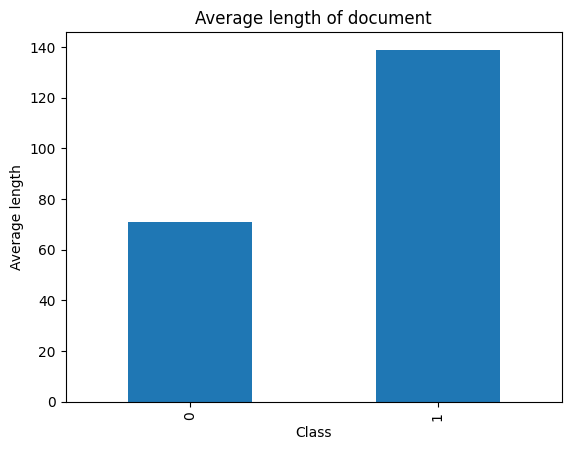

In [26]:
avg_doc_len = pd.DataFrame([not_spam_avg_doc_len, spam_avg_doc_len])
avg_doc_len.plot(kind = 'bar', legend=False)
plt.title("Average length of document")
plt.xlabel("Class")
plt.ylabel("Average length")

Average number of digits per document

In [27]:
spam_avg_digits_per_doc = spam_data['text'].str.count(r'\d').mean()
not_spam_avg_digits_per_doc = not_spam_data['text'].str.count(r'\d').mean()

print ('Average no. of digits per document for spam:',spam_avg_digits_per_doc)
print ('Average no. of digits per document for not spam:',not_spam_avg_digits_per_doc)

Average no. of digits per document for spam: 15.759036144578314
Average no. of digits per document for not spam: 0.2992746113989637


Text(0, 0.5, 'Average no. of digits')

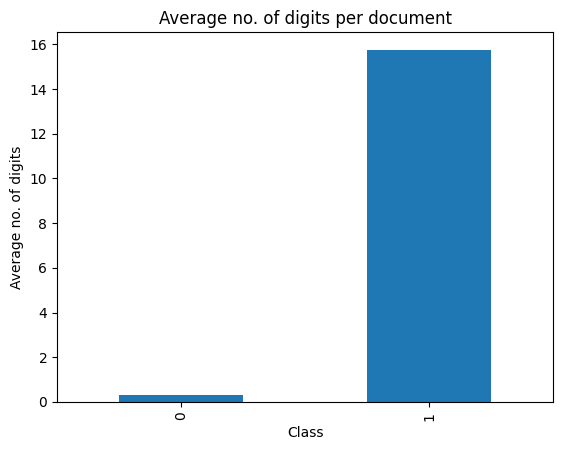

In [28]:
avg_doc_len = pd.DataFrame([not_spam_avg_digits_per_doc, spam_avg_digits_per_doc])
avg_doc_len.plot(kind = 'bar', legend=False)
plt.title("Average no. of digits per document")
plt.xlabel("Class")
plt.ylabel("Average no. of digits")

Avg Number of non word character 

In [29]:
spam_avg_non_word_chars = spam_data['text'].str.count(r'[^a-zA-Z0-9-]+').mean()
not_spam_avg_non_word_chars = not_spam_data['text'].str.count(r'[^a-zA-Z0-9-]+').mean()

print ('Average no. of digits per document for spam:',spam_avg_non_word_chars)
print ('Average no. of digits per document for not spam:',not_spam_avg_non_word_chars)

Average no. of digits per document for spam: 24.589022757697457
Average no. of digits per document for not spam: 14.32518134715026


Text(0, 0.5, 'Average no. of non word chars')

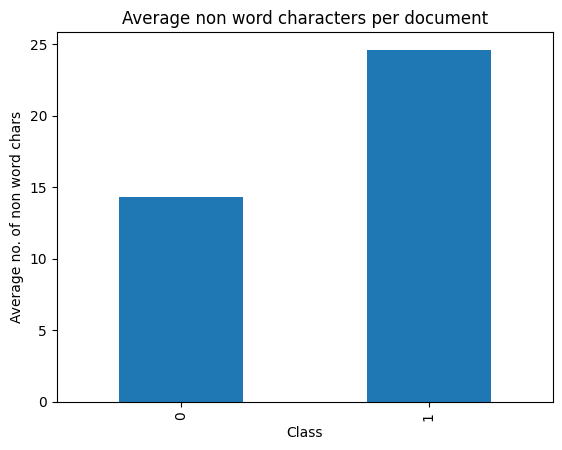

In [30]:
avg_doc_len = pd.DataFrame([not_spam_avg_non_word_chars, spam_avg_non_word_chars])
avg_doc_len.plot(kind = 'bar', legend=False)
plt.title("Average non word characters per document")
plt.xlabel("Class")
plt.ylabel("Average no. of non word chars")

In [ ]:
##DataPreprocessing

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create the transform
tfidf = TfidfVectorizer(min_df=3)
# tokenize and build vocab
tfidf.fit(X_train)
# encode the training data
idf = tfidf.idf_
X_train_v = tfidf.transform(X_train)
X_test_v = tfidf.transform(X_test)
tfidf_dict = dict(zip(tfidf.get_feature_names_out(), idf))
tfidf_df = pd.DataFrame.from_dict(tfidf_dict, orient='index').reset_index()
tfidf_df.columns=('token','idf')
tfidf_df = tfidf_df.sort_values(by='idf', ascending=False)

In [32]:
X_train_v.shape

(3900, 2190)

In [33]:
X_test_v.shape

(1672, 2190)

**SVM Classifiers **

In [34]:
from sklearn.svm import SVC
clfsvm = SVC(C=10000)
clfsvm.fit(X_train_v, y_train)
y_pred = clfsvm.predict(X_test_v)

In [35]:
import numpy as np
from sklearn.metrics import roc_auc_score
print (roc_auc_score(y_pred, y_test))

0.987246963562753


In [36]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

In [37]:
from sklearn.metrics import accuracy_score,precision_score, recall_score
print(f"Confusion matrix: \n {confusion_matrix(y_test, y_pred)}")
print(f"Accuracy: \t {accuracy_score(y_test, y_pred):.2%}")
print(f"Precision: \t {precision_score(y_test, y_pred):.3f}")
print(f"Recall: \t {recall_score(y_test, y_pred):.3f}")


Confusion matrix: 
 [[1452    1]
 [  30  189]]
Accuracy: 	 98.15%
Precision: 	 0.995
Recall: 	 0.863


Logistic Regression Classifier

In [38]:
from sklearn.linear_model import LogisticRegression

clflr = LogisticRegression(C=100)
clflr.fit(X_train_v, y_train)
y_pred = clflr.predict(X_test_v)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
print (roc_auc_score(y_pred, y_test))

0.9835393506996293


In [40]:
from sklearn.metrics import accuracy_score,precision_score, recall_score
print(f"Confusion matrix: \n {confusion_matrix(y_test, y_pred)}")
print(f"Accuracy: \t {accuracy_score(y_test, y_pred):.2%}")
print(f"Precision: \t {precision_score(y_test, y_pred):.3f}")
print(f"Recall: \t {recall_score(y_test, y_pred):.3f}")


Confusion matrix: 
 [[1450    3]
 [  26  193]]
Accuracy: 	 98.27%
Precision: 	 0.985
Recall: 	 0.881


Evaluation and Conclusions

// Accuracy=  (TP+TN)/(TP+TN+FP+FN)

//Precision =   TP / (TP + FP)


// Recall =   TP / (TP + FN)

**SVM Classifier with additional features:**

Accuracy: 	 98.15%

Precision: 	 0.995

Recall: 	 0.863

**Logistic Regression with additional features:**

 Accuracy: 	 98.27%    

Precision: 	 0.985     

Recall: 	 0.881       